In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import calinski_harabasz_score  
#set OMP_NUM_THREADS=3
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei'] 

x = pd.read_csv("D:/forestfires.csv")
x_train = x.iloc[1:, 5:10]

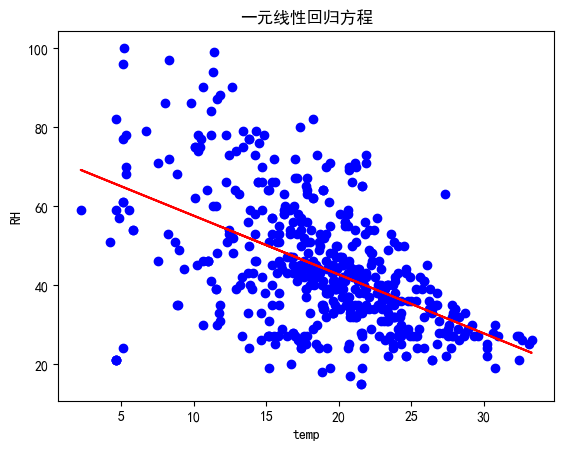

一元线性回归方程为：y=-1.49x+72.41
R2为： 0.2785154685995589


In [2]:
# 线性回归模型
Linear = LinearRegression() 
temp_data = x_train[["temp"]]
RH_data = x_train[["RH"]]
Linear.fit(temp_data, RH_data)  
predict_data = Linear.predict(temp_data) 
plt.scatter(temp_data, RH_data, c = 'blue')
plt.plot(temp_data, predict_data, c = 'red')
plt.title('一元线性回归方程')
plt.xlabel('temp')
plt.ylabel('RH')
plt.show()
w = Linear.coef_[0][0]
b = Linear.intercept_[0]
R2 = Linear.score(temp_data, RH_data)
print("一元线性回归方程为：y={:.2f}x+{:.2f}".format(w,b))
print("R2为：", R2)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

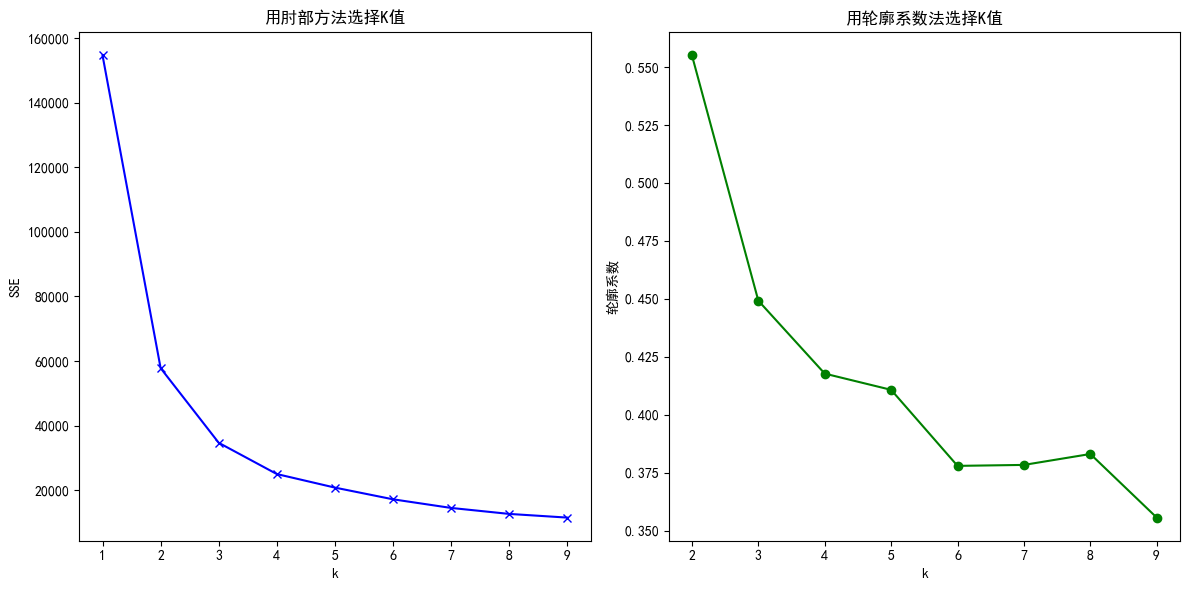

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


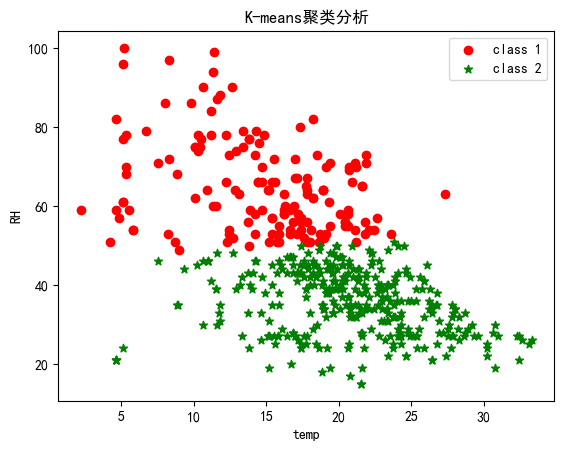

SSE:  57794.84697747006
Silhouette Coefficient:  0.5550442114385086


In [3]:
#K-means聚类分析
X = x_train[['temp','RH']]
K=range(1,10)
meanDispersions=[]
sse=[]
silhouette_scores = []
for k in K:
    kmeans=KMeans(n_clusters=k,init='k-means++', n_init=3)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    if k != 1:
        silhouette_avg = silhouette_score(X,kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
# 绘制不同k值的SSE值图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(K,sse,'bx-')
plt.xlabel('k')
plt.ylabel('SSE')  #SSE是每个点到其最近的聚类中心的距离的平方和
plt.title('用肘部方法选择K值')
# 绘制不同k值的轮廓分数图
plt.subplot(1, 2, 2)  
K_list = range(2,10)
plt.plot(K_list,silhouette_scores, 'go-')  
plt.title('用轮廓系数法选择K值')
plt.xlabel('k')
plt.ylabel('轮廓系数')  
plt.tight_layout() 
plt.show() 
#由SSE的拐点和轮廓系数最高点来确定k值
k_KMeans = 2
kmeans=KMeans(n_clusters = k_KMeans, init='k-means++', n_init=3)
result=kmeans.fit_predict(X)
plt.scatter(temp_data[result == 0],RH_data[result == 0],c='red', marker='o',label = 'class 1')
plt.scatter(temp_data[result == 1],RH_data[result == 1],c='green', marker='*',label = 'class 2')
plt.legend()
plt.title('K-means聚类分析')
plt.xlabel('temp')
plt.ylabel('RH')
plt.show()
print("SSE: ",kmeans.inertia_ )
print("Silhouette Coefficient: ", silhouette_score(X,kmeans.labels_))

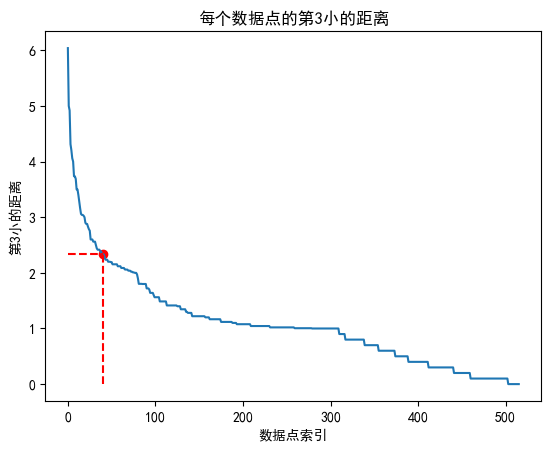

eps为2.332380757938121
MinPts为4


C:\Users\Yimso\AppData\Local\Temp\ipykernel_15612\4229897826.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X['temp'][y_dbscan==-1], X['RH'][y_dbscan==-1], c="green", marker='*', cmap='viridis', label='class1')
C:\Users\Yimso\AppData\Local\Temp\ipykernel_15612\4229897826.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X['temp'][y_dbscan==0], X['RH'][y_dbscan==0],c="red", marker='o', cmap='viridis', label='class2')
C:\Users\Yimso\AppData\Local\Temp\ipykernel_15612\4229897826.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X['temp'][y_dbscan==2], X['RH'][y_dbscan==2],c="blue", marker='+', cmap='viridis', label='class3')
C:\Users\Yimso\AppData\Local\Temp\ipykernel_15612\4229897826.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X['temp'][y_

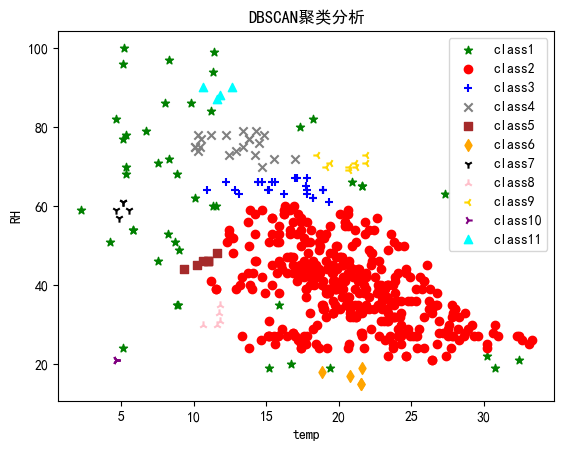

Silhouette Coefficient:  -0.10510811007900309
Calinski-Harabasz Index:  71.13225749751463


In [4]:
# 使用DBSCAN进行聚类
def select_MinPts(data, k):  
    dist_matrix = distance.cdist(data, data)    
    k_dist = np.sort(dist_matrix, axis=1)[:, k-1]  
    return k_dist  
k = 2**2-1
k_dist = select_MinPts(x_train[['temp','RH']], k)  
k_dist.sort()  
k_dist= k_dist[::-1]
plt.plot(np.arange(k_dist.shape[0]), k_dist)  
# 由拐点确定邻域半径
m=40
eps = k_dist[m]
plt.scatter(m,eps,color="r")
plt.plot([0,m],[eps,eps],linestyle="--",color = "r")
plt.plot([m,m],[0,eps],linestyle="--",color = "r")
plt.xlabel('数据点索引')  
plt.ylabel('第{}小的距离'.format(k))  
plt.title('每个数据点的第{}小的距离'.format(k))  
plt.show()
MinPts = int(k+1)
print('eps为{}'.format(eps))
print('MinPts为{}'.format(MinPts))
dbscan = DBSCAN(eps=eps, min_samples=MinPts)
y_dbscan = dbscan.fit_predict(X)
plt.scatter(X['temp'][y_dbscan==-1], X['RH'][y_dbscan==-1], c="green", marker='*', cmap='viridis', label='class1')  
plt.scatter(X['temp'][y_dbscan==0], X['RH'][y_dbscan==0],c="red", marker='o', cmap='viridis', label='class2')  
plt.scatter(X['temp'][y_dbscan==2], X['RH'][y_dbscan==2],c="blue", marker='+', cmap='viridis', label='class3')  
plt.scatter(X['temp'][y_dbscan==3], X['RH'][y_dbscan==3], c="gray", marker='x', cmap='viridis', label='class4')  
plt.scatter(X['temp'][y_dbscan==4], X['RH'][y_dbscan==4],c="brown", marker='s', cmap='viridis', label='class5')  
plt.scatter(X['temp'][y_dbscan==5], X['RH'][y_dbscan==5],c="orange", marker='d', cmap='viridis', label='class6')  
plt.scatter(X['temp'][y_dbscan==6], X['RH'][y_dbscan==6], c="black", marker='1', cmap='viridis', label='class7')  
plt.scatter(X['temp'][y_dbscan==7], X['RH'][y_dbscan==7],c="pink", marker='2', cmap='viridis', label='class8')  
plt.scatter(X['temp'][y_dbscan==8], X['RH'][y_dbscan==8],c="gold", marker='3', cmap='viridis', label='class9') 
plt.scatter(X['temp'][y_dbscan==9], X['RH'][y_dbscan==9],c="purple", marker='4', cmap='viridis', label='class10') 
plt.scatter(X['temp'][y_dbscan==10], X['RH'][y_dbscan==10],c="cyan", marker='^', cmap='viridis', label='class11') 
plt.legend()
plt.title("DBSCAN聚类分析")
plt.xlabel("temp")
plt.ylabel("RH")
plt.show()
non_noise_indices = y_dbscan != -1  
y_dbscan=y_dbscan[non_noise_indices]  #排除噪声点
x_train_select = X[non_noise_indices]
# 计算轮廓系数  
score = silhouette_score(x_train_select, y_dbscan) 
print("Silhouette Coefficient: ", score)
 
# 计算CH指数  
score = calinski_harabasz_score(x_train_select, y_dbscan) 
print("Calinski-Harabasz Index: ", score)

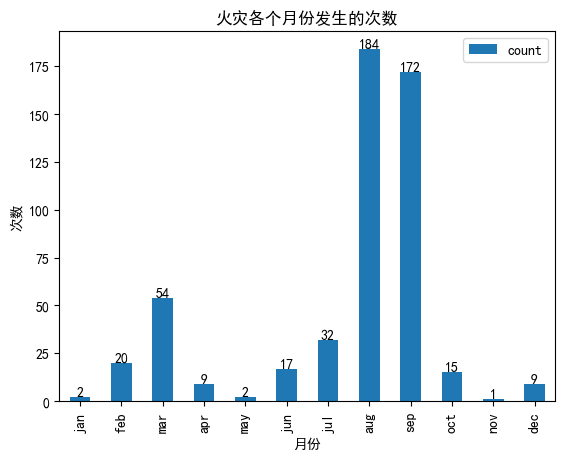

In [5]:
# 使用GroupBy进行聚类
result = x.groupby('month').count()['Y']
result = pd.DataFrame(result,result.index)
result = result.rename(columns={'Y': 'count'})
# 自定义排序键，将月份字符串映射到它们的顺序  
month_order = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,  
               'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}  
result.sort_values(by='month', key=lambda x: [month_order[month] for month in x], inplace=True)  
result.plot(kind='bar', stacked=True)
ax = plt.gca()   
for p in ax.patches:   
    height = p.get_height()   
    x = p.get_x() + p.get_width() / 2  
    ax.text(x, height + 0.5, 
            '{:.0f}'.format(height),  
            ha="center")
plt.title('火灾各个月份发生的次数')
plt.xlabel('月份')
plt.ylabel('次数')
plt.show()